In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv")
df.head()

,entity,year,income_group,gdp_pc,el_access_total,el_access_urban,el_access_rural,population,pop_no_el_access_total,urban_share,...,el_from_solar,el_from_oil,el_from_wind,el_from_bioenergy,renewables_other,el_inst_capacity_total,income_group_num,supply_rate,t_demand,gap
0,Angola,2000,Lower middle income,556.884216,24.238865,44.931600,3.473994,16394067,12011852,50.087,...,0.0,0.53,0.0,0.0,0.0,500.0,2,0.059409,5.940872,4.500872
1,Angola,2001,Lower middle income,527.464111,20.000000,30.000000,9.477077,16941584,13556602,51.274,...,0.0,0.62,0.0,0.0,0.0,500.0,2,0.082000,8.200000,6.560000
2,Angola,2002,Lower middle income,872.657654,26.320255,47.670353,2.759651,17516140,12897117,52.461,...,0.0,0.62,0.0,0.0,0.0,500.0,2,0.066869,6.686865,4.926865
3,Angola,2003,Lower middle income,982.805603,27.355137,49.043540,2.255916,18124346,13144298,53.645,...,0.0,0.75,0.0,0.0,0.0,500.0,2,0.072747,7.274685,5.284685
4,Angola,2004,Lower middle income,1254.696167,28.395485,50.428510,1.653744,18771128,13405173,54.827,...,0.0,0.49,0.0,0.0,0.0,624.0,2,0.078886,7.888578,5.648578


In [3]:
df.shape

(1104, 31)

In [4]:
df.columns

Index(['entity', 'year', 'income_group', 'gdp_pc', 'el_access_total',
       'el_access_urban', 'el_access_rural', 'population',
       'pop_no_el_access_total', 'urban_share', 'el_generation', 'el_demand',
       'net_imports', 'el_generation_pc', 'el_demand_pc',
       'final_energy_consumption', 'fin_support', 'el_from_coal',
       'el_from_gas', 'el_from_nuclear', 'el_from_hydro', 'el_from_solar',
       'el_from_oil', 'el_from_wind', 'el_from_bioenergy', 'renewables_other',
       'el_inst_capacity_total', 'income_group_num', 'supply_rate', 't_demand',
       'gap'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   entity                    1104 non-null   object 
 1   year                      1104 non-null   int64  
 2   income_group              1104 non-null   object 
 3   gdp_pc                    1104 non-null   float64
 4   el_access_total           1104 non-null   float64
 5   el_access_urban           1104 non-null   float64
 6   el_access_rural           1104 non-null   float64
 7   population                1104 non-null   int64  
 8   pop_no_el_access_total    1104 non-null   int64  
 9   urban_share               1104 non-null   float64
 10  el_generation             1104 non-null   float64
 11  el_demand                 1104 non-null   float64
 12  net_imports               1104 non-null   float64
 13  el_generation_pc          1104 non-null   float64
 14  el_deman

In [6]:
df.isna().sum()

entity                      0
year                        0
income_group                0
gdp_pc                      0
el_access_total             0
el_access_urban             0
el_access_rural             0
population                  0
pop_no_el_access_total      0
urban_share                 0
el_generation               0
el_demand                   0
net_imports                 0
el_generation_pc            0
el_demand_pc                0
final_energy_consumption    0
fin_support                 0
el_from_coal                0
el_from_gas                 0
el_from_nuclear             0
el_from_hydro               0
el_from_solar               0
el_from_oil                 0
el_from_wind                0
el_from_bioenergy           0
renewables_other            0
el_inst_capacity_total      0
income_group_num            0
supply_rate                 0
t_demand                    0
gap                         0
dtype: int64

In [7]:
df.describe([0.1, 0.25, 0.5, 0.75, 0.95,1.0]).T

,count,mean,std,min,10%,25%,50%,75%,95%,100%,max
year,1104.0,2.011000e+03,6.636256e+00,2.000000e+03,2002.000000,2.005000e+03,2.011000e+03,2.017000e+03,2.021000e+03,2.022000e+03,2.022000e+03
gdp_pc,1104.0,2.012555e+03,2.874185e+03,1.104609e+02,324.870383,5.068356e+02,8.571074e+02,1.941656e+03,8.170784e+03,1.984972e+04,1.984972e+04
el_access_total,1104.0,3.994580e+01,2.595091e+01,1.279584e+00,8.917386,1.696954e+01,3.713982e+01,5.650000e+01,8.998650e+01,1.000000e+02,1.000000e+02
el_access_urban,1104.0,6.594071e+01,2.279117e+01,3.500000e+00,33.509759,4.988736e+01,6.885090e+01,8.514721e+01,9.800000e+01,1.000000e+02,1.000000e+02
el_access_rural,1104.0,2.247927e+01,2.543634e+01,0.000000e+00,1.265233,3.274249e+00,1.377245e+01,3.165667e+01,8.286998e+01,1.000000e+02,1.000000e+02
population,1104.0,1.891110e+07,2.934209e+07,8.007300e+04,940419.300000,2.130476e+06,1.048111e+07,2.164752e+07,6.896424e+07,2.167834e+08,2.167834e+08
pop_no_el_access_total,1104.0,1.150505e+07,1.628418e+07,1.440000e+02,211172.200000,1.176106e+06,7.242000e+06,1.308546e+07,5.460317e+07,8.962977e+07,8.962977e+07
urban_share,1104.0,4.104729e+01,1.708635e+01,8.246000e+00,17.860500,2.844150e+01,3.978350e+01,5.198175e+01,7.221185e+01,9.073500e+01,9.073500e+01
el_generation,1104.0,8.593324e+00,3.523579e+01,2.000000e-02,0.120000,2.800000e-01,1.065000e+00,5.162500e+00,1.771700e+01,2.634900e+02,2.634900e+02
el_demand,1104.0,8.651404e+00,3.483122e+01,2.000000e-02,0.150000,3.500000e-01,1.475000e+00,4.827500e+00,1.657650e+01,2.603400e+02,2.603400e+02


<Axes: >

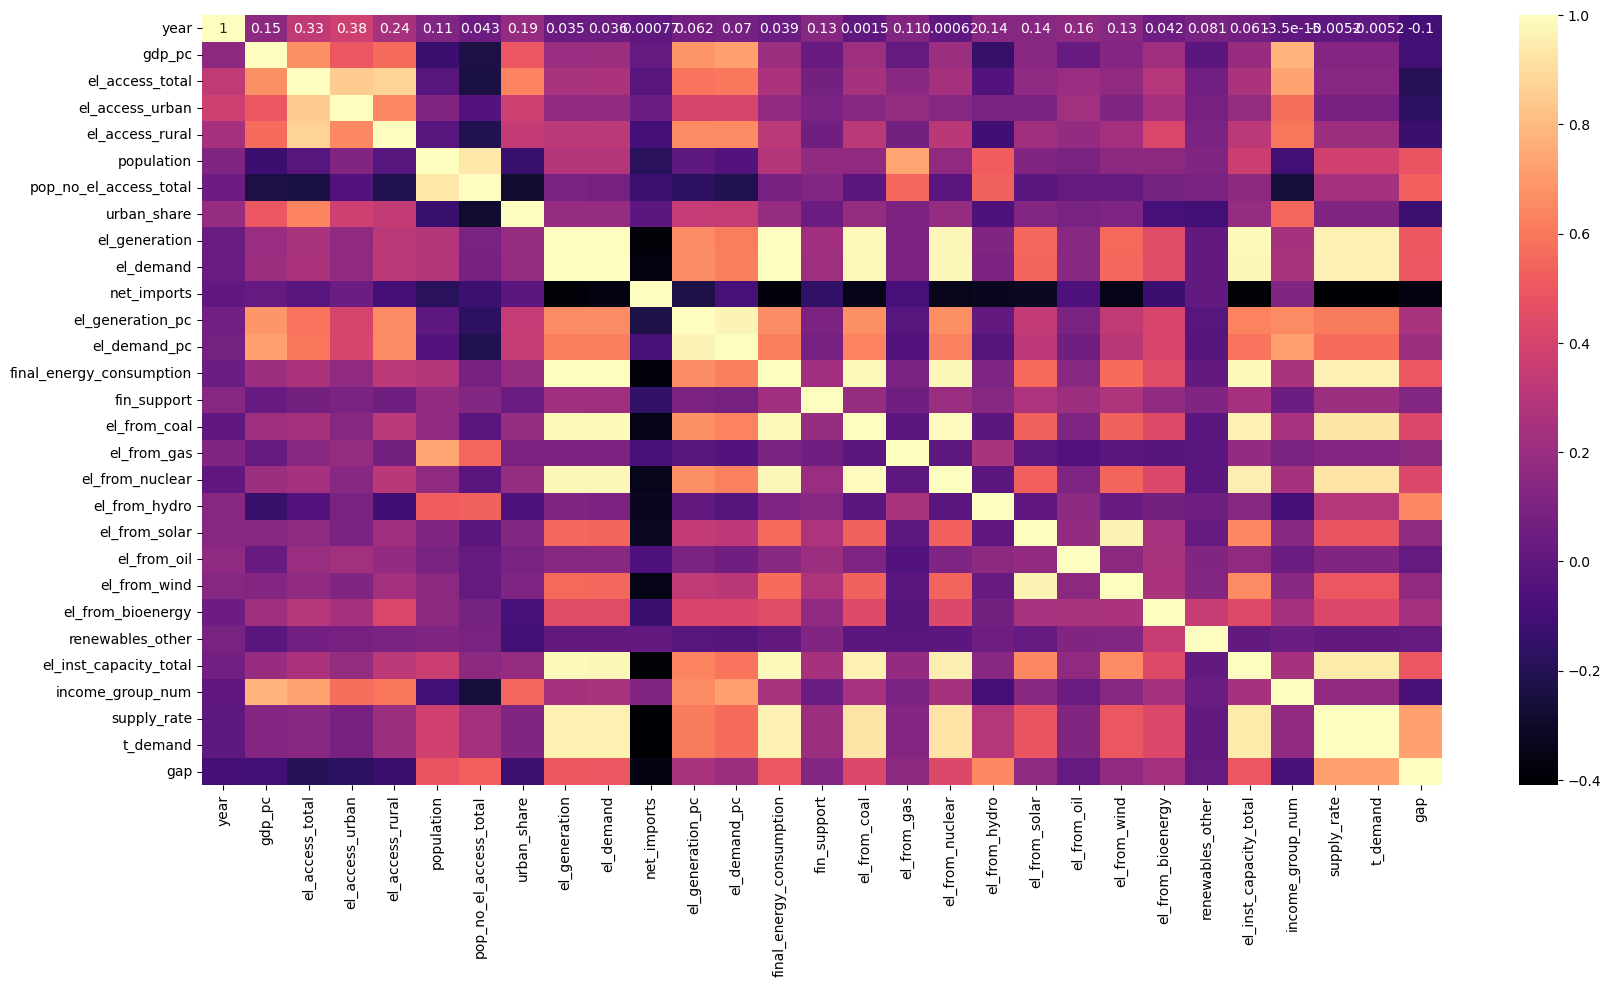

In [8]:
dg=df[['year', 'gdp_pc', 'el_access_total',
       'el_access_urban', 'el_access_rural', 'population',
       'pop_no_el_access_total', 'urban_share', 'el_generation', 'el_demand',
       'net_imports', 'el_generation_pc', 'el_demand_pc',
       'final_energy_consumption', 'fin_support', 'el_from_coal',
       'el_from_gas', 'el_from_nuclear', 'el_from_hydro', 'el_from_solar',
       'el_from_oil', 'el_from_wind', 'el_from_bioenergy', 'renewables_other',
       'el_inst_capacity_total', 'income_group_num', 'supply_rate', 't_demand',
       'gap']]
plt.figure(figsize=(20,10))
sns.heatmap(dg.corr(), annot=True, cmap="magma")

In [9]:
df_no=df[['entity','el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','gdp_pc']]

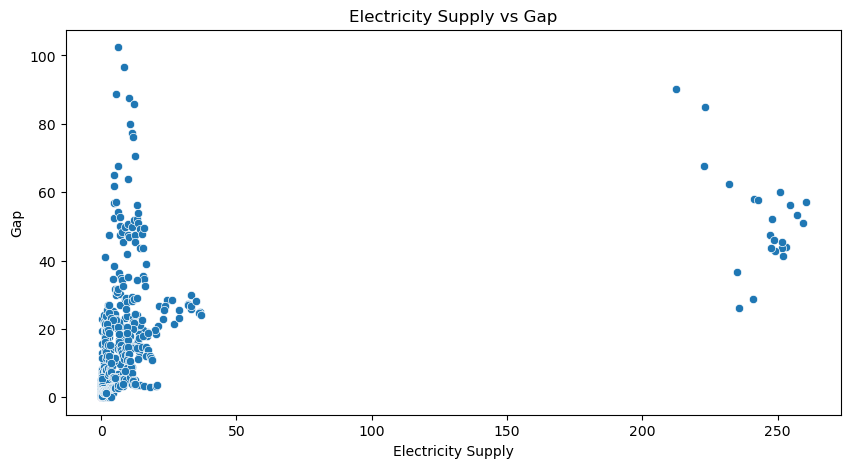

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='el_demand', y='gap')
plt.xlabel('Electricity Supply')
plt.ylabel('Gap')
plt.title('Electricity Supply vs Gap')
plt.show()

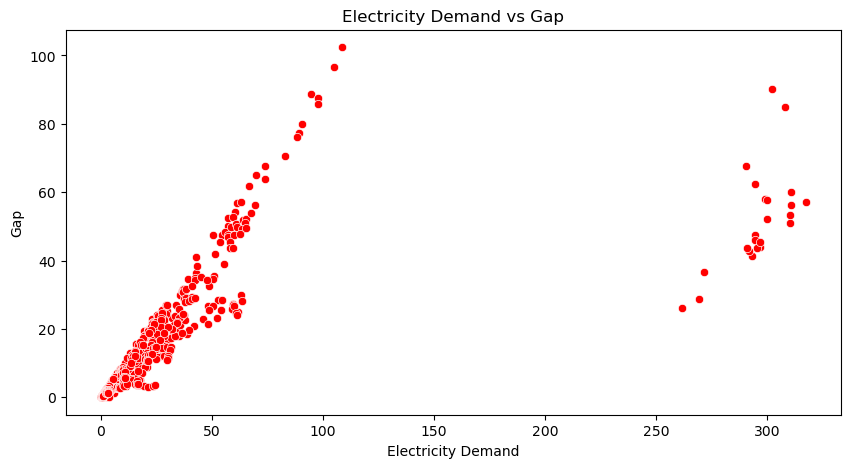

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='t_demand', y='gap', color='red')
plt.xlabel('Electricity Demand')
plt.ylabel('Gap')
plt.title('Electricity Demand vs Gap')
plt.show()

In [12]:
df_na=df[['entity','el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','gdp_pc']]

In [13]:
df_na.shape

(1104, 15)

In [14]:
!pip install numpy pandas tensorflow scikit-learn matplotlib --quiet


In [ ]:
pip install tensorflow --quiet

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential

# Load and preprocess data
data = df

# Calculate total demand and gap using primary energy consumption and electricity access
data['total_demand'] = data['primary_energy_consumption_pc'] * data['population'] * (data['electricity_access_total'] / 100)
data['gap'] = data['total_demand'] - (data['electricity_generation'] + data['net_imports'])

# Group by entity (country) to aggregate the data
grouped_data = data.groupby('entity').agg({
    'total_demand': 'sum',
    'electricity_generation': 'sum',
    'net_imports': 'sum',
    'gap': 'sum'
}).reset_index()

# Normalize the gap data
scaler = MinMaxScaler(feature_range=(0, 1))
grouped_data['scaled_gap'] = scaler.fit_transform(grouped_data['gap'].values.reshape(-1, 1))

# Adjust the dimensions of scaled_gap for the GAN
# Flatten the scaled gap data to match the input shape for the GAN
flattened_scaled_gap = grouped_data['scaled_gap'].values

# Ensure the reshaped dimensions are appropriate for the GAN input
reshaped_scaled_gap = np.tile(flattened_scaled_gap, (1, 28*28)).reshape(-1, 28, 28)

# Split the data into training and testing sets
train_data, test_data = train_test_split(reshaped_scaled_gap, test_size=0.2, random_state=42)
train_data = np.array(train_data)
test_data = np.array(test_data)

# Define a simple GAN generator
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(28*28, activation='sigmoid'))
    model.add(Reshape((28, 28)))
    return model

# Define a simple GAN discriminator
def build_discriminator(input_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator((28, 28))

discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build and compile the GAN
gan = Sequential([generator, discriminator])
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Parameters
epochs = 10000
batch_size = 64
half_batch = batch_size // 2

# Adversarial ground truths
valid = np.ones((half_batch, 1))
fake = np.zeros((half_batch, 1))

# Training the GAN
for epoch in range(epochs):

    # ---------------------
    #  Train Discriminator
    # ---------------------

    # Select a random half batch of data
    idx = np.random.randint(0, train_data.shape[0], half_batch)
    real_data = train_data[idx]

    # Generate a half batch of new data
    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    gen_data = generator.predict(noise)

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_data, valid)
    d_loss_fake = discriminator.train_on_batch(gen_data, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    #  Train Generator
    # ---------------------

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Train the generator (to have the discriminator label samples as valid)
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print the progress
    if epoch % 100 == 0:
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")

# Evaluate the model on test data
test_noise = np.random.normal(0, 1, (test_data.shape[0], latent_dim))
generated_test_data = generator.predict(test_noise)

# Compare generated data with actual test data
# Note: Additional evaluation metrics and visualization may be necessary

# Display generated vs. actual test data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Generated Test Data")
plt.imshow(generated_test_data[0], cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Actual Test Data")
plt.imshow(test_data[0], cmap='gray')
plt.show()


KeyError: 'primary_energy_consumption_pc'

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import time

# Load and preprocess data
#data = pd.read_csv('electricity_data.csv')
data=df_no
# Calculate total_demand and gap
data['total_demand'] = data['electricity_pc'] * data['population']
data['gap'] = data['total_demand'] - (data['electricity_generation'] + data['net imports - twh'])

# Normalize the gap data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_gap = scaler.fit_transform(data['gap'].values.reshape(-1, 1))

# Adjust the dimensions of scaled_gap for the GAN
scaled_gap_reshaped = np.tile(scaled_gap, (1, 28*28)).reshape(-1, 28, 28)

# Define the generator model
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(784, activation='sigmoid'))
    model.add(Reshape((28, 28)))
    return model

# Define the discriminator model
def build_discriminator(input_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Instantiate the generator and discriminator
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator((28, 28))

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build and compile the GAN model
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(latent_dim,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Parameters
epochs = 2000  # Reduced epochs
batch_size = 32  # Smaller batch size
half_batch = batch_size // 2

# Adversarial ground truths
valid = np.ones((half_batch, 1))
fake = np.zeros((half_batch, 1))

# Training the GAN
start_time = time.time()
for epoch in range(epochs):

    # ---------------------
    #  Train Discriminator
    # ---------------------

    # Select a random half batch of data
    idx = np.random.randint(0, scaled_gap_reshaped.shape[0], half_batch)
    real_data = scaled_gap_reshaped[idx]

    # Generate a half batch of new data
    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    gen_data = generator.predict(noise)

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_data, valid)
    d_loss_fake = discriminator.train_on_batch(gen_data, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    #  Train Generator
    # ---------------------

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Train the generator (to have the discriminator label samples as valid)
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print the progress
    if epoch % 100 == 0 or epoch == epochs - 1:
        elapsed_time = time.time() - start_time
        print(f"{epoch}/{epochs} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]:.2f}%] [G loss: {g_loss}] Time: {elapsed_time:.2f} sec")

# Generate new data for forecasting
noise = np.random.normal(0, 1, (1, latent_dim))
generated_gap = generator.predict(noise)

# Reshape and inverse transform the generated data to original scale
generated_gap_reshaped = generated_gap.reshape(1, -1)[:, :scaled_gap.shape[0]]
forecasted_gap = scaler.inverse_transform(generated_gap_reshaped)

print(f"Forecasted Gap: {forecasted_gap[0][0]}")


In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize the forecasted gap
plt.figure(figsize=(10, 6))
plt.bar(['Forecasted Gap'], [forecasted_gap[0][0]], color='blue')
plt.title('Forecasted Electricity Demand-Supply Gap')
plt.ylabel('Gap (Units)')
plt.show()


In [14]:
#supply rate
df_no['supply_rate']=df_no['electricity_generation_adj']/df_no['electricity_access_total']
#demand
df_no['demand']=100*df_no['supply_rate']
#gap
df_no['gap']=df_no['demand']-df_no['electricity_generation_adj']

In [20]:
pip install tensorflow --quiet

## Gap Creation

In [16]:

#supply rate
df_na['supply_rate']=df_na['el_demand']/df_na['el_access_total']
#t_demand1
df_na['t_demand']=100*df_na['supply_rate']
#gap1
df_na['gap']=df_na['t_demand']-df_na['el_demand']
#gap2
#df_no['gap2']=df_no['pop_no_el_access_total']*df_no['el_demand_pc']/1000000
#t_demand2
#df_no['t_demand2']=df_no['el_demand']+df_no['gap2']
#df_no.head()

In [17]:
df_na.head()

,entity,el_access_urban,el_demand,el_access_rural,population,net_imports,el_demand_pc,fin_support,el_from_gas,pop_no_el_access_total,urban_share,income_group_num,year,el_access_total,gdp_pc,supply_rate,t_demand,gap
0,Angola,44.931600,1.44,3.473994,16394067,0.0,0.09,0.00,0.0,12011852,50.087,2,2000,24.238865,556.884216,0.059409,5.940872,4.500872
1,Angola,30.000000,1.64,9.477077,16941584,0.0,0.10,0.00,0.0,13556602,51.274,2,2001,20.000000,527.464111,0.082000,8.200000,6.560000
2,Angola,47.670353,1.76,2.759651,17516140,0.0,0.10,0.00,0.0,12897117,52.461,2,2002,26.320255,872.657654,0.066869,6.686865,4.926865
3,Angola,49.043540,1.99,2.255916,18124346,0.0,0.11,0.05,0.0,13144298,53.645,2,2003,27.355137,982.805603,0.072747,7.274685,5.284685
4,Angola,50.428510,2.24,1.653744,18771128,0.0,0.12,0.04,0.0,13405173,54.827,2,2004,28.395485,1254.696167,0.078886,7.888578,5.648578


In [18]:
df_no=df_na[['entity','el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','gdp_pc','gap']]

dff=df_no.iloc[:1050,:]

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataframe
dff_pr = dff  # replace with your actual data file

# Assuming the relevant features are the columns you've mentioned earlier
features =  ['el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','gdp_pc']

# Ensure no missing values in the selected features
dff_pr = dff_pr.dropna(subset=features)

# Prepare the data for modeling
X = dff_pr[features]
y = dff_pr['gap']

# Convert categorical features to numerical using one-hot encoding
#X = pd.get_dummies(X, columns=['income_group'], drop_first=True)

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")

X_train shape: (840, 14)
X_test shape: (210, 14)
y_train shape: (840,)
y_test shape: (210,)
entities_train shape: (840,)
entities_test shape: (210,)


In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1.2406180262261772
Mean Squared Error (MSE): 8.561782177233175
Root Mean Squared Error (RMSE): 2.926052319633601


       Entity    Actual  Predicted
0     Eritrea  0.500756   0.890118
1  Mauritania  1.963997   1.394422
2      Guinea  4.703410   2.381784
3    Eswatini  0.360149   0.625918
4       Benin  2.179834   2.601767


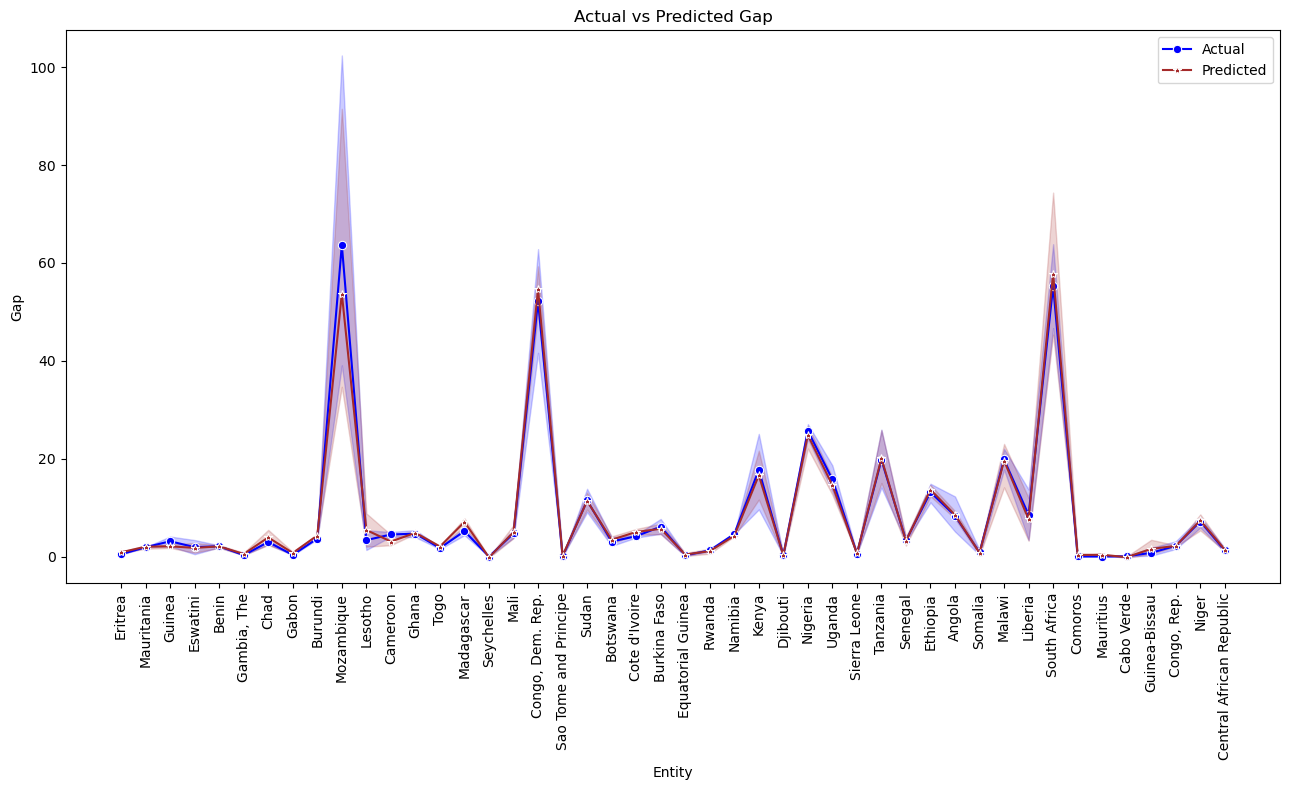

In [21]:
# Predicting future values (for demonstration, using the test set)
future_gap_forecast = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': future_gap_forecast
}).reset_index(drop=True)

print(results_df.head())

# Plot the actual vs predicted values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 8))
sns.lineplot(data=results_df, x='Entity', y='Actual', label='Actual', marker='o', c='blue')
sns.lineplot(data=results_df, x='Entity', y='Predicted', label='Predicted', marker='*',c='brown')
plt.xticks(rotation=90)
plt.xlabel('Entity')
plt.ylabel('Gap')
plt.title('Actual vs Predicted Gap')
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
from scikeras.wrappers import KerasRegressor


In [23]:
from scikeras.wrappers import KerasRegressor



In [67]:
!pip uninstall tf-keras tensorflow --quiet



Proceed (Y/n)? Y
Proceed (Y/n)? Y


In [72]:
%pip install tensorflow==2.16.1 --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 761.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.2 MB/s eta 0:00:00


In [8]:
%pip install tensorflow==2.12.0 --quiet

In [6]:
#from keras.wrappers.scikit_learn import KerasRegressor
#%pip install keras==2.12.0 --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.12.0 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [3]:
%pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [29]:
from scikeras.wrappers import KerasRegressor

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from scikeras.wrappers import KerasRegressor

# Load your dataframe
dff_pr = dff  # replace with your actual data file

# Ensure no missing values in the selected features
features = ['el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','gdp_pc']

# Prepare the data for modeling
#dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))




In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataframe
dff_pr = df_no  # replace with your actual data file

# Ensure no missing values in the selected features
features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
            'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total', 'gdp_pc']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.40, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")




X_train shape: (662, 14)
X_test shape: (442, 14)
y_train shape: (662,)
y_test shape: (442,)
entities_train shape: (662,)
entities_test shape: (442,)


In [34]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 153.1249 - val_loss: 236.9741
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 142.0508 - val_loss: 170.7863
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 117.0718 - val_loss: 128.0614
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92.5491 - val_loss: 108.9290
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75.9036 - val_loss: 95.7709
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.5127 - val_loss: 83.1659
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68.2464 - val_loss: 76.4704
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.3005 - val_loss: 66.5568
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.1608 - val_loss: 60.2942
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.3370 - val_loss: 53.1929
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.8302 - val_loss: 47.6628
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━

In [ ]:

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

14/14 [==============================] - 0s 10ms/step
     Entity     Actual  Predicted
0  Djibouti   0.276666   0.377484
1    Uganda  16.177778  20.843529
2  Eswatini   1.077630   0.138248
3    Guinea   1.407353   1.760490
4     Kenya   3.966316   4.571550


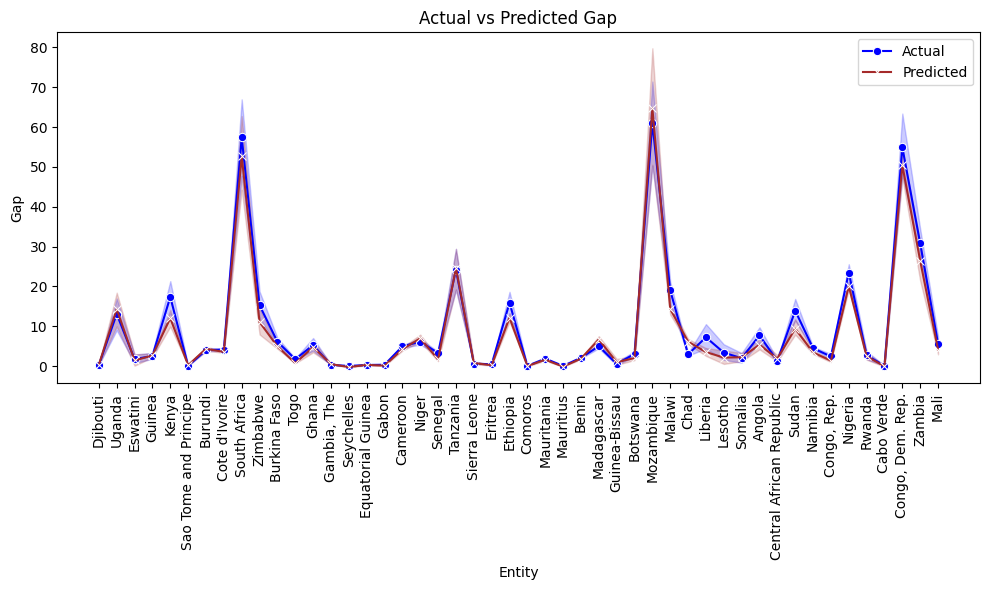

In [36]:
# Predict on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': y_pred.flatten()
}).reset_index(drop=True)

print(results_df.head())

# Plot the actual vs predicted values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Entity', y='Actual', label='Actual', marker='o', c="b")
sns.lineplot(data=results_df, x='Entity', y='Predicted', label='Predicted', marker='x', c='brown')
plt.xticks(rotation=90)
plt.xlabel('Entity')
plt.ylabel('Gap')
plt.title('Actual vs Predicted Gap')
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Load your dataframe
dff_pr = df_no  # replace with your actual data file

# Ensure no missing values in the selected features
features = [
    'year', 'income_group', 'gdp_pc', 'electricity_access_total',
    'electricity_access_urban', 'electricity_access_rural', 'population',
    'pop_no_electr_access_total', 'urban_share', 'el_gross_demand',
    'el_gross_production', 'el_net_production', 'electricity_generation',
    'electricity_generation_adj', 'net_imports', 'electricity_pc',
    'elec_gener_adj_pc', 'final_energy_consumption', 'finans_support',
    'electricity_from_coal', 'electricity_from_gas',
    'electricity_from_nuclear', 'electricity_from_hydro',
    'electricity_from_solar', 'electricity_from_oil',
    'electricity_from_wind', 'electricity_from_bioenergy',
    'renewables_other', 'electr_inst_capacity_total'
]

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['income_group'], drop_first=True)

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")


X_train shape: (883, 1, 31)
X_test shape: (221, 1, 31)
y_train shape: (883,)
y_test shape: (221,)
entities_train shape: (883,)
entities_test shape: (221,)


In [25]:
# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")


Epoch 1/100
23/23 [==============================] - 3s 17ms/step - loss: 253.2896 - val_loss: 275.7793
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 244.3852 - val_loss: 262.5381
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 232.3128 - val_loss: 245.0079
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 215.8095 - val_loss: 218.0507
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 195.5046 - val_loss: 192.8671
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 173.1803 - val_loss: 167.0725
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 151.8713 - val_loss: 142.4053
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 133.5793 - val_loss: 118.7191
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 112.2281 - val_loss: 100.9769
Epoch 10/100
23/23 [==============================] - 0s 6ms/step - loss

7/7 [==============================] - 0s 2ms/step
     Entity     Actual  Predicted
0  Djibouti   0.276666   0.337854
1    Uganda  16.177778  17.509716
2  Eswatini   1.077630   0.965201
3    Guinea   1.407353   2.630727
4     Kenya   3.966316   3.164399


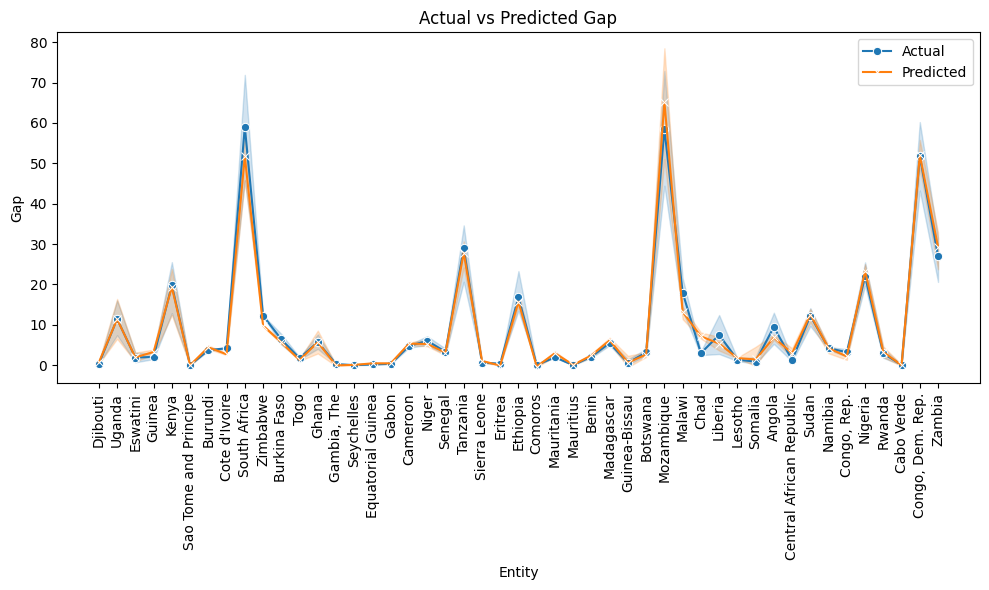

In [26]:
# Predict on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': y_pred.flatten()
}).reset_index(drop=True)

print(results_df.head())

# Plot the actual vs predicted values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Entity', y='Actual', label='Actual', marker='o')
sns.lineplot(data=results_df, x='Entity', y='Predicted', label='Predicted', marker='x')
plt.xticks(rotation=90)
plt.xlabel('Entity')
plt.ylabel('Gap')
plt.title('Actual vs Predicted Gap')
plt.legend()
plt.tight_layout()
plt.show()


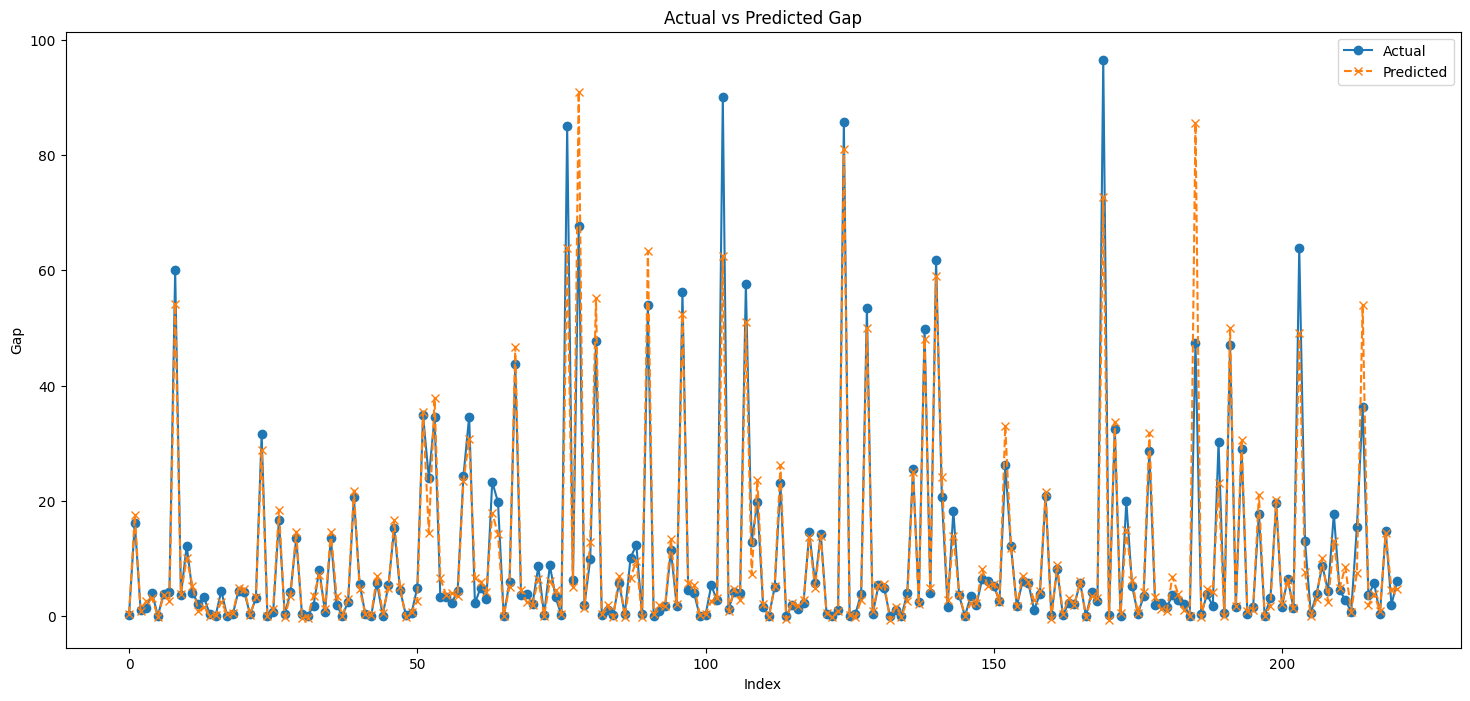

In [28]:
# Plot the actual vs predicted values
plt.figure(figsize=(18, 8))
plt.plot(results_df.index, results_df['Actual'], label='Actual', marker='o', linestyle='-')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted', marker='x', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Gap')
plt.title('Actual vs Predicted Gap')
plt.legend()
plt.show()

In [32]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=4cc4b30ad987f7443f2743857f1bf0fcd52a0b19ec43614388b0f9b8c0d972c3
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance

# Load your dataframe
dff_pr = df_no  # replace with your actual data file

# Ensure no missing values in the selected features
features = [
    'year', 'income_group', 'gdp_pc', 'electricity_access_total',
    'electricity_access_urban', 'electricity_access_rural', 'population',
    'pop_no_electr_access_total', 'urban_share', 'el_gross_demand',
    'el_gross_production', 'el_net_production', 'electricity_generation',
    'electricity_generation_adj', 'net_imports', 'electricity_pc',
    'elec_gener_adj_pc', 'final_energy_consumption', 'finans_support',
    'electricity_from_coal', 'electricity_from_gas',
    'electricity_from_nuclear', 'electricity_from_hydro',
    'electricity_from_solar', 'electricity_from_oil',
    'electricity_from_wind', 'electricity_from_bioenergy',
    'renewables_other', 'electr_inst_capacity_total'
]

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['income_group'], drop_first=True)

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

# Predict on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': y_pred.flatten()
}).reset_index(drop=True)





Epoch 1/100
23/23 [==============================] - 2s 15ms/step - loss: 253.9950 - val_loss: 278.2473
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 247.4690 - val_loss: 269.3680
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 237.6614 - val_loss: 251.8157
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 222.2863 - val_loss: 226.8496
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 200.6612 - val_loss: 203.1360
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 182.1421 - val_loss: 176.5467
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 162.7286 - val_loss: 153.7954
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 144.8149 - val_loss: 133.0639
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 123.1452 - val_loss: 113.9180
Epoch 10/100
23/23 [==============================] - 0s 6ms/step - loss

In [36]:
print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

Train Loss: 7.266506671905518
Test Loss: 18.592748641967773


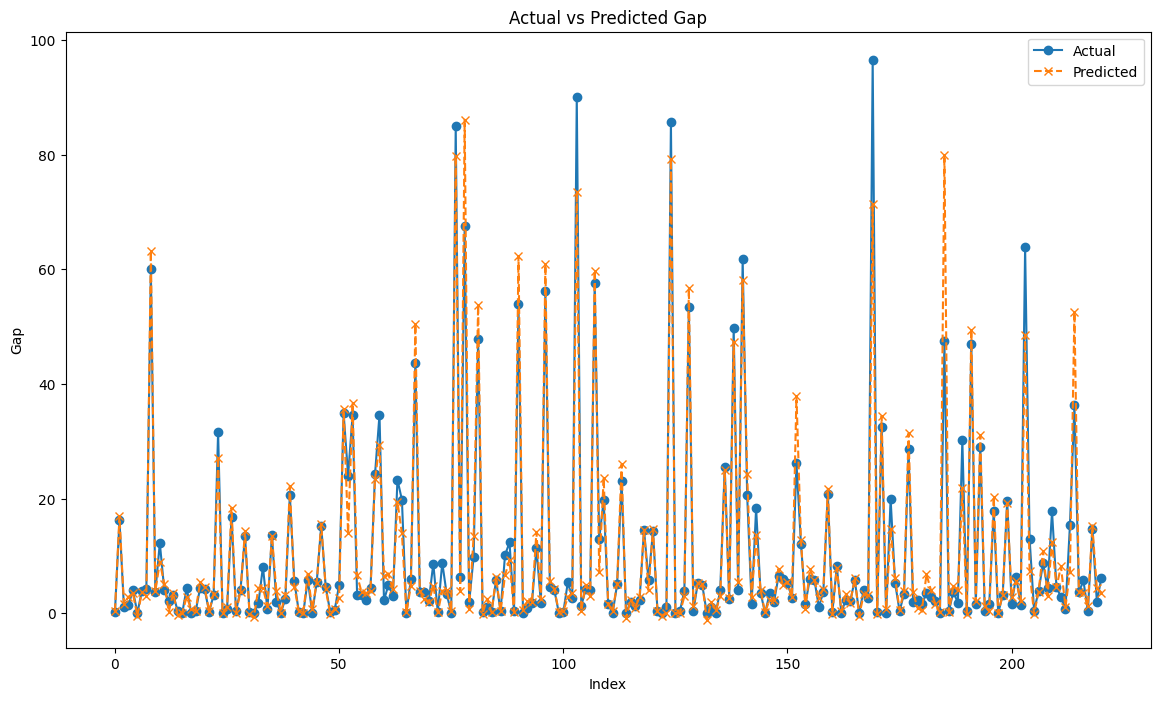

In [37]:
# Plot the actual vs predicted values
plt.figure(figsize=(14, 8))
plt.plot(results_df.index, results_df['Actual'], label='Actual', marker='o', linestyle='-')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted', marker='x', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Gap')
plt.title('Actual vs Predicted Gap')
plt.legend()
plt.show()

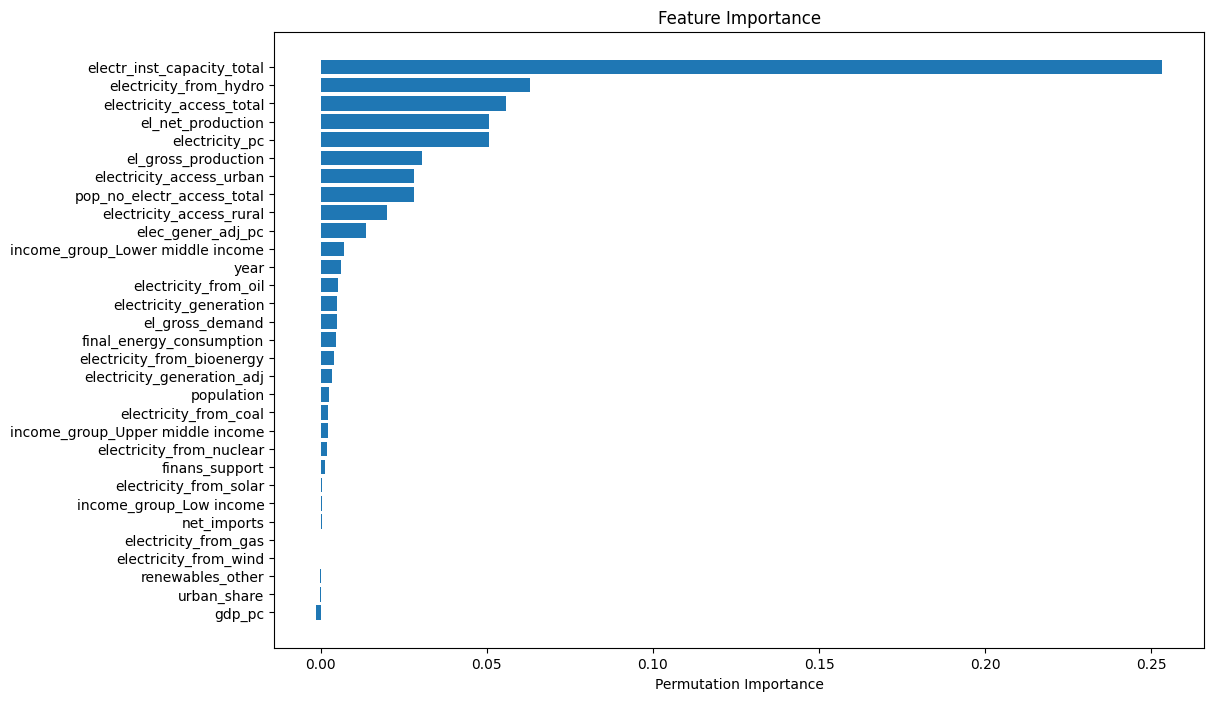

In [38]:
# Feature importance using Permutation Importance (requires scikit-learn wrapper for Keras)
from sklearn.ensemble import RandomForestRegressor

# Use a RandomForestRegressor for feature importance
rf = RandomForestRegressor()
rf.fit(X_train.reshape(X_train.shape[0], X_train.shape[2]), y_train)

perm = PermutationImportance(rf, random_state=1).fit(X_test.reshape(X_test.shape[0], X_test.shape[2]), y_test)
eli5.show_weights(perm, feature_names=X.columns.tolist())

# Plot feature importances
feature_importances = perm.feature_importances_
features_sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(12, 8))
plt.barh(range(len(features_sorted_idx)), feature_importances[features_sorted_idx], align='center')
plt.yticks(range(len(features_sorted_idx)), [X.columns[i] for i in features_sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()


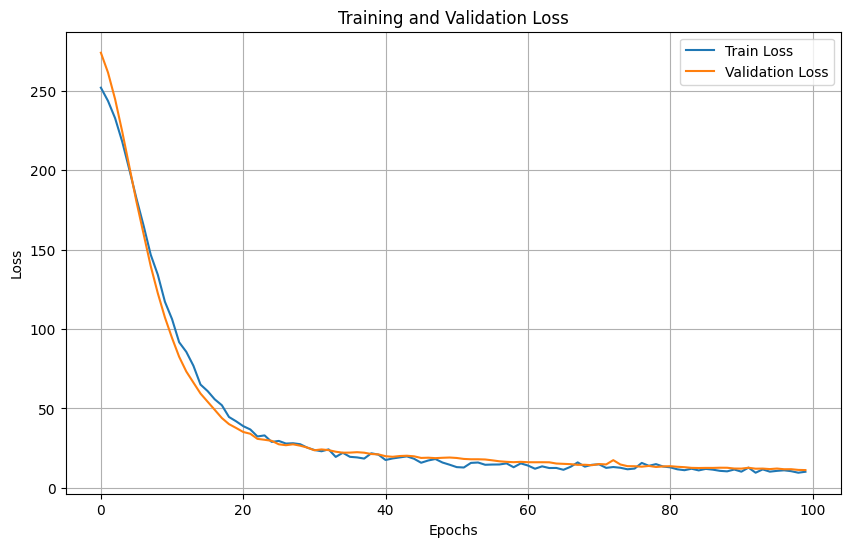

In [34]:
import matplotlib.pyplot as plt

# Assuming you have a training history recorded in the 'history' object
# For example:
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
